# 1. Preliminaries

In [2]:
import torch

## Getting started

In [3]:
x = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [4]:
x.numel()

12

In [5]:
x.shape

torch.Size([12])

In [6]:
X = x.reshape(3, 4)
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [7]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [8]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [9]:
torch.randn(3, 4)

tensor([[-0.7384, -0.7675,  1.3266,  0.4195],
        [-0.3300,  0.5956, -0.1266,  0.6179],
        [-0.3972,  0.3707,  1.2126, -1.1180]])

In [10]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

## Indexing and Slicing

In [11]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [12]:
X[1, 2] = 17
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5., 17.,  7.],
        [ 8.,  9., 10., 11.]])

In [13]:
X[:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

## Operations

In [14]:
torch.exp(x)

tensor([162754.7969, 162754.7969, 162754.7969, 162754.7969, 162754.7969,
        162754.7969, 162754.7969, 162754.7969,   2980.9580,   8103.0840,
         22026.4648,  59874.1406])

In [15]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [16]:
X.reshape(-1, 3), X

(tensor([[12., 12., 12.],
         [12., 12., 12.],
         [12., 12.,  8.],
         [ 9., 10., 11.]]),
 tensor([[12., 12., 12., 12.],
         [12., 12., 12., 12.],
         [ 8.,  9., 10., 11.]]))

In [17]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [18]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [19]:
X.sum()

tensor(66.)

## Broadcasting

Broadcasting works according to the following two-step procedure: (i) expand one or both arrays by copying elements along axes with length 1 so that after this transformation, the two tensors have the same shape; (ii) perform an elementwise operation on the resulting arrays.

In [20]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [21]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

## Saving Memory

In [22]:
# Python point Y to another location after dereferencing it
before = id(Y)
Y = Y + X
id(Y) == before

False

### In place operations
to perform in place operations we can overwrite the values of the tensor and replace them with the new value using slicing notation.

In [23]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 1969042408304
id(Z): 1969042408304


In [24]:
before = id(X)
X += Y
id(X) == before

True

## Conversion to Other Python Objects

In [25]:
A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [26]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

## Data Preprocessing

### Reading the Dataset

In [27]:
import pandas as pd

data_file = 'data/house_tiny.csv'
data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


## Data Preparation

In [28]:
inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       NaN           False          True
1       2.0           False          True
2       4.0            True         False
3       NaN           False          True


In [29]:
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       3.0           False          True
1       2.0           False          True
2       4.0            True         False
3       3.0           False          True


In [30]:
targets

0    127500
1    106000
2    178100
3    140000
Name: Price, dtype: int64

### Conversion to Tensors

In [31]:
import torch

X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(targets.to_numpy(dtype=float))
X, y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

## Linear Algebra

### Matrices

In [32]:
A = torch.arange(6).reshape(3, 2)
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [33]:
# Transpose
A.T

tensor([[0, 2, 4],
        [1, 3, 5]])

In [34]:
A = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
A,A == A.T

(tensor([[1, 2, 3],
         [2, 0, 4],
         [3, 4, 5]]),
 tensor([[True, True, True],
         [True, True, True],
         [True, True, True]]))

### Tensors

 We denote general tensors by capital letters with a special font face (e.g., 
X, Y, and Z ) and their indexing mechanism (e.g.,$x_{ijk}$ and [X]$_{1,2i-1,3}$
) follows naturally from that of matrices.

In [35]:
torch.arange(24).reshape(2, 3, 4)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

### Basic Properties of Tensor Arithmetic

#### elementwise operations

In [36]:
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B = A.clone()  # Assign a copy of A to B by allocating new memory
A, A + B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

In [37]:
# Hadamard product(elementwise product)
A*B

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

In [38]:
# Scalar by tensor operation
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

### Reduction

In [39]:
# summing elements
x = torch.arange(3, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2.]), tensor(3.))

In [40]:
A[:] = 1+A

#### 1. Summing Over All Elements of a Tensor

In [41]:
A.shape, A.sum()

(torch.Size([2, 3]), tensor(21.))

#### 2. Summing Along Specific Axes

we can specify the axis along which the sum will be computed

In [42]:
# Axis 0 : Summing along axis 0 collapses the rows, resulting in a tensor with one less dimension (the row dimension is removed).

A.shape, A.sum(axis=0).shape

# A.sum(axis=0) sums along the rows:
# Row 1: [1, 2, 3]
# Row 2: [4, 5, 6]
# Result: [1+4, 2+5, 3+6] = [5, 7, 9]
# The output shape is (3,) because the row dimension is collapsed.

(torch.Size([2, 3]), torch.Size([3]))

In [43]:
# Axis 1 : Summing along axis 1 collapses the columns, resulting in a tensor with one less dimension (the column dimension is removed).

A.shape, A.sum(axis=1).shape

# A.sum(axis=1) sums along the columns:
# Column 1: [1, 4]
# Column 2: [2, 5]
# Column 3: [3, 6]
# Result: [1+2+3, 4+5+6] = [6, 15]
# The output shape is (2,) because the column dimension is collapsed.

(torch.Size([2, 3]), torch.Size([2]))

#### 3. Summing Along Multiple Axes

You can also sum along multiple axes simultaneously by passing a list of axes to the .sum() function. This is equivalent to summing all elements of the tensor.

In [44]:
A.sum(axis=[0, 1]) == A.sum()  # Sum along both rows and columns

tensor(True)

### Non-Reduction Sum

In [45]:
A

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [46]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A, sum_A.shape

(tensor([[ 6.],
         [15.]]),
 torch.Size([2, 1]))

### Dot Products

In [47]:
y = torch.ones(3, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.))

### Matrix–Vector Products

In [48]:
A,x

(tensor([[1., 2., 3.],
         [4., 5., 6.]]),
 tensor([0., 1., 2.]))

In [49]:
A.shape, x.shape, torch.mv(A, x), A@x

(torch.Size([2, 3]), torch.Size([3]), tensor([ 8., 17.]), tensor([ 8., 17.]))

### Matrix–Matrix Multiplication

In [50]:
B = torch.ones(3, 4)
torch.mm(A, B), A@B

(tensor([[ 6.,  6.,  6.,  6.],
         [15., 15., 15., 15.]]),
 tensor([[ 6.,  6.,  6.,  6.],
         [15., 15., 15., 15.]]))

In [51]:
B,A

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 tensor([[1., 2., 3.],
         [4., 5., 6.]]))

### Norms

In [52]:
# l2 norm
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [53]:
# l1 norm
torch.abs(u).sum()

tensor(7.)

## Calculus

In [54]:
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

### Derivatives and Differentiation

In [55]:
def f(x):
    return 3 * x ** 2 - 4 * x

In [56]:
for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


### Visualization Utilities

In [57]:
def use_svg_display():  #@save
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')

In [58]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [59]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [60]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""

    def has_one_axis(X):  # True if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None:
        axes = d2l.plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

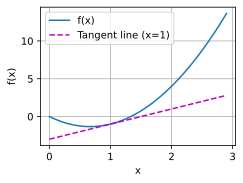

In [61]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

### Partial Derivatives and Gradients

To calculate $\frac{\partial y}{\partial x_i}$, 
we can treat $x_1, \ldots, x_{i-1}, x_{i+1}, \ldots, x_n$ as constants 
and calculate the derivative of $y$ with respect to $x_i$.
The following notational conventions for partial derivatives 
are all common and all mean the same thing:

$$\frac{\partial y}{\partial x_i} = \frac{\partial f}{\partial x_i} = \partial_{x_i} f = \partial_i f = f_{x_i} = f_i = D_i f = D_{x_i} f.$$

We can concatenate partial derivatives 
of a multivariate function 
with respect to all its variables 
to obtain a vector that is called
the *gradient* of the function.
Suppose that the input of function 
$f: \mathbb{R}^n \rightarrow \mathbb{R}$ 
is an $n$-dimensional vector 
$\mathbf{x} = [x_1, x_2, \ldots, x_n]^\top$ 
and the output is a scalar. 
The gradient of the function $f$ 
with respect to $\mathbf{x}$ 
is a vector of $n$ partial derivatives:

$$\nabla_{\mathbf{x}} f(\mathbf{x}) = \left[\partial_{x_1} f(\mathbf{x}), \partial_{x_2} f(\mathbf{x}), \ldots
\partial_{x_n} f(\mathbf{x})\right]^\top.$$ 

## Automatic Differentiation

In [62]:
import torch

### A Simple Function

we are interested in differentiating the function $y=2x^Tx$ 
 with respect to the column vector $x$

In [63]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [64]:
# Can also create x = torch.arange(4.0, requires_grad=True)
x.requires_grad_(True)
x.grad  # The gradient is None by default

In [65]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [66]:
y.backward()
x.grad # x.grad == 4*x

tensor([ 0.,  4.,  8., 12.])

In [67]:
x.grad == 4 * x

tensor([True, True, True, True])

In [68]:
x.grad.zero_()  # Reset the gradient
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### Backward for Non-Scalar Variables

-> The problem with PyTorch is that it can't calculate gradient for non-scalar input, that's why we use the argument `.backward(gradient=...)`

In [69]:
x.grad.zero_() # reset the gradient
y = x * x
y.backward(gradient=torch.ones(len(y)))  # Faster: y.sum().backward()
y, x.grad # x.grad == 2*x

(tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>), tensor([0., 2., 4., 6.]))

### Detaching Computation

**Key Takeaway**: Detaching creates a "snapshot" of a value, cutting off its history for gradient calculations.

In [70]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [71]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

### Gradients and Python Control Flow

In deep learning frameworks like PyTorch, automatic differentiation works even when the computational path involves Python control flow (e.g., loops, conditionals). Here’s the key idea:

In [72]:
def f(a):
    b = a * 2
    while b.norm() < 1000:  # Loop depends on input
        b = b * 2
    if b.sum() > 0:          # Branch depends on input
        c = b
    else:
        c = 100 * b
    return c



In [73]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()  # Computes gradient despite dynamic control flow

## Probability and Statistics

In [74]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

Python’s random.random() generates numbers uniformly in the interval [0, 1].

Split the interval [0, 1] into two equal parts:
- Heads: Numbers ≥ 0.5 (probability = 0.5).
- Tails: Numbers < 0.5 (probability = 0.5).

For each "toss", check if random.random() > 0.5. If True, count it as a head; otherwise, a tail.

In [75]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [49, 51]


- In this run, 52 heads and 48 tails were observed.
- With a fair coin, the counts should be ≈50-50 for large num_tosses (due to the Law of Large Numbers), but small deviations like this are normal due to randomness.

In [76]:
num_tosses = 100000000
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [50005397, 49994603]


we can use the `multinomial` function to simulate multiple draws from any variabl, setting the first argument to the number of draws and the second as a list of probabilities associated with each of the possible outcomes.

In [77]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(10000, fair_probs).sample(), Multinomial(10000, fair_probs).sample()/10000 # frequency of each outcome

(tensor([5021., 4979.]), tensor([0.4995, 0.5005]))

### The law of large numbers

let's see how our estimate outcome evolves as we grow the number of tosses from 1 to 10000

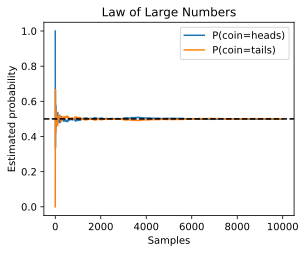

In [78]:
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.title('Law of Large Numbers')
d2l.plt.legend()


In [79]:
import torch
print(dir(torch.distributions))


['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'CumulativeDistributionTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PositiveDefiniteTransform', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'SoftplusTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution',

In [80]:
help(torch.ones)
torch.ones(4,4)

Help on built-in function ones in module torch:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

# 2. Linear Neural Networks for Regression

## 2.1 Linear Regression

### Vectorization for Speed

In [81]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

In [82]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

In [87]:
# classic for loop
c = torch.zeros(n)
t = time.time()
for i in range(n):
    c[i] = a[i] + b[i]
f'{time.time() - t:.5f} sec'

'0.16678 sec'

In [91]:
# vectorized operation
t = time.time()
d = a + b
f'{time.time() - t:.5f} sec'

'0.00182 sec'

The second method is dramatically faster than the first. Vectorizing code often yields order-of-magnitude speedups. Moreover, we push more of the mathematics to the library so we do not have to write as many calculations ourselves, reducing the potential for errors and increasing portability of the code.

### The Normal Distribution and Squared Loss

In [92]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 * (x - mu)**2 / sigma**2)

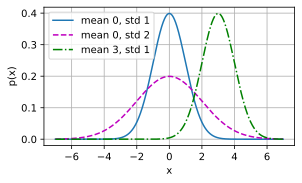

In [93]:
# Use NumPy again for visualization
x = np.arange(-7, 7, 0.01)

# Mean and standard deviation pairs
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

## 2.2 Object-Oriented Design for Implementation

in this part we will be building classes for our 3 modules : (i) Model which contains models, losses and optimization methods; (ii) DataModule provides data loaders for training and validation; (iii) both classes are combined using the Trainer class, which allows us to train models on a variety of hardware platforms. 

In [2]:
import time
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

### 2.2.1 Utilities

#### 2.2.1.1 Add function to class

The first utility function allows us to register functions as methods in a class after the class has been created. In fact, we can do so even after we have created instances of the class! It allows us to split the implementation of a class into multiple code blocks.

In [3]:
def add_to_class(Class):  #@save
    """Register functions as methods in created class."""
    def wrapper(obj):
        setattr(Class, obj.__name__, obj)
    return wrapper

#### 2.2.1.2 Save arguments as attributes

The second one is a utility class that saves all arguments in a class’s `__init__` method as class attributes. This allows us to extend constructor call signatures implicitly without additional code.


In [4]:
class HyperParameters:  #@save
    """The base class of hyperparameters."""
    def save_hyperparameters(self, ignore=[]):
        raise NotImplemented

## 2.3 Synthetic Regression Data

In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

### 2.3.1 Generating the Dataset

In [4]:
class SyntheticRegressionData(d2l.DataModule):  #@save
    """Synthetic data for linear regression."""
    def __init__(self, w, b, noise=0.01, num_train=1000, num_val=1000,
                 batch_size=32):
        super().__init__()
        self.save_hyperparameters()
        n = num_train + num_val
        self.X = torch.randn(n, len(w))
        noise = torch.randn(n, 1) * noise
        self.y = torch.matmul(self.X, w.reshape((-1, 1))) + b + noise

In [5]:
data = SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)

In [10]:
print('features:', data.X[0],'\nlabel:', data.y[0])

features: tensor([ 0.5983, -0.0524]) 
label: tensor([5.5726])


In [11]:
len(data.X), len(data.y)

(2000, 2000)

### 2.3.2 Reading the Dataset

In [ ]:
@d2l.add_to_class(SyntheticRegressionData)
def get_dataloader(self, train):
    if train:
        indices = list(range(0, self.num_train))
        # The examples are read in random order
        random.shuffle(indices)
    else:
        indices = list(range(self.num_train, self.num_train+self.num_val))
    for i in range(0, len(indices), self.batch_size):
        batch_indices = torch.tensor(indices[i: i+self.batch_size])
        yield self.X[batch_indices], self.y[batch_indices]

## 2.4 Linear Regression Implementation from Scratch

In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

### 2.4.1 Defining the Model

we initialize the weights with a normal distribution with mean 0 and standard deviation of 0.01

In [6]:
class LinearRegressionScratch(d2l.Module):  #@save
    """The linear regression model implemented from scratch."""
    def __init__(self, num_inputs, lr, sigma=0.01):
        super().__init__()
        self.save_huperparameters()
        self.w = torch.normal(0, sigma, (num_inputs, 1), requires_grad=True)
        self.b = torch.zeros(1, requires_grad=True)

In [7]:
@d2l.add_to_class(LinearRegressionScratch)  #@save
def forward(self, X):
    return torch.matmul(X, self.w) + self.b

### 2.4.2 Defining the loss function

In [8]:
@d2l.add_to_class(LinearRegressionScratch)  #@save
def loss(self, y_hat, y):
    l = (y_hat - y) ** 2 / 2
    return l.mean()

### 2.4.3 Defining the Optimization Algorithm


In [9]:
class SGD(d2l.HyperParameters):  #@save
    """Minibatch stochastic gradient descent."""
    def __init__(self, params, lr):
        self.save_hyperparameters()

    def step(self):
        for param in self.params:
            param -= self.lr * param.grad

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()

In [10]:
@d2l.add_to_class(LinearRegressionScratch)  #@save
def configure_optimizers(self):
    return SGD([self.w, self.b], self.lr)

### 2.4.4 Training

In [11]:
@d2l.add_to_class(d2l.Trainer)  #@save
def prepare_batch(self, batch):
    return batch

@d2l.add_to_class(d2l.Trainer)  #@save
def fit_epoch(self):
    self.model.train()
    for batch in self.train_dataloader:
        loss = self.model.training_step(self.prepare_batch(batch)).optim.zero_grad()
        with torch.no_grad():
            loss.backward()
            if self.gradient_clip_val > 0:  # To be discussed later
                self.clip_gradients(self.gradient_clip_val, self.model)
            self.optim.step()
        self.train_batch_idx += 1
    if self.val_dataloader is None:
        return
    self.model.eval()
    for batch in self.val_dataloader:
        with torch.no_grad():
            self.model.validation_step(self.prepare_batch(batch))
        self.val_batch_idx += 1

In [12]:
# Initialize 
model = LinearRegressionScratch(2, lr=0.03) 
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2) 
trainer = d2l.Trainer(max_epochs=3) 
# Train 
trainer.fit(model, data)

AttributeError: 'LinearRegressionScratch' object has no attribute 'save_huperparameters'